In [1]:
# executeme

using NBInclude
@nbinclude("Kagome SP.ipynb")

get_SP_H (generic function with 1 method)

In [2]:
Nx = 2; Ny = 3; N = 3*Nx*Ny
# t1=-1;L1=0 ;t2=L2=0
# t1=L1=0;t2=L2=-1
t1 = -1;L1 = 0.28;t2 = 0.3;L2 = 0.2;
# t1=t2=-1;L1=L2=0
PN = 3; U = 100;

### Hard-Core Interaction

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
Generalized Fermionic Fock States:
\begin{align}
c_\alpha^{\dagger}\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\left(\sqrt{n_\alpha+1} \right) \ket{...,n_\beta,n_\alpha+1,n_\gamma,...} 
\\
c_\alpha\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\sqrt{n_\alpha} \ket{...,n_\beta,n_\alpha-1,n_\gamma,...} 
\end{align}

But, is transition operator fermionic or bosonic? Let's check:

In [6]:
# ParticleNum = 2; HardCoreStates = fermionstates(NBasis, [ParticleNum]); HardCoreBasis =  ManyBodyBasis(NBasis, HardCoreStates)
# dense(transition(HardCoreBasis, 2,1))

Transition operator is bosonic operator due to fermionic states doesn't include -1 coefficient in transition matrix.
So, we can construct hard core many body basis by using fermionic states. Note that we work only bosons on lattice.

--------------

Construct hard-core states of bosonic system (Delete 2 occupation number in bosonic system):

In [7]:
# # Find hard-core states for only 2 particle
# function delete(M,N)
#     """
#     M is bosonic states
#     N is occupation number
#     Returns Delete N occupation states from M bosonic states
#     """
#     function myCondition(y)
#         return N == y
#     end
#     m = []
#     for i in 1:length(M)
#        if findfirst(myCondition,M[i]) != nothing
#             push!(m,i)
#        end
#     end
#     return deleteat!(M,m)
# end

In [8]:
# # All of states in N Fock Space 
# # Max. Occupation number is equal to 1 (Hard-Core Interaction or Many-Body for Fermionic States)
# HC_States = bosonstates(NBasis, [PN]) 
# # Delete PN=2 states from bosonic states to use in hard-core intereaction
# HC_States = delete(HC_States, 2)
# # Many-Body Basis
# HC_Basis_MB = ManyBodyBasis(NBasis, HC_States)

Conclusion: Hard-Core Bosonic System with Delete Function = Fermionic System

-----------

In [4]:
# executeme

sp_op = get_SP_H(Nx, Ny, t1, L1, t2, L2);

In [5]:
function get_Fermionic_MB_basis(N,PN)
    
    NBasis = NLevelBasis(N)
    HC_States = fermionstates(NBasis, [PN]) 
    HC_Basis_MB = ManyBodyBasis(NBasis, HC_States);
    
    return HC_Basis_MB
end

get_Fermionic_MB_basis (generic function with 1 method)

In [7]:
HC_Basis_MB = get_Fermionic_MB_basis(N,PN);

In [8]:
function Kagome_Hard_Core(mb_basis, Nx, Ny, sp_op)
    
    N = Nx*Ny*3
    # Many-Body Hamiltonian using METHOD #1 (MANUEL CONSTRUCTING)
    HC_Hamiltonian_MB = SparseOperator(mb_basis)
    # Number of states for Hard-core bosonic system is equal to number of states for fermionic system
    for m in 1:N
        for n in 1:N
            # Phase Factors= H_NN[m,n] and H_NNN[m,n]
            # Hopping Terms= transition(HC_NBasis_MB, m, n)
            # The Neighbors Condition Hides Here: H[m,n]
            HC_Hamiltonian_MB += sp_op.data[m,n] * transition(mb_basis, m, n)
        end
    end
    return HC_Hamiltonian_MB
end

Kagome_Hard_Core (generic function with 1 method)

In [9]:
HC_Hamiltonian_MB = Kagome_Hard_Core(HC_Basis_MB, Nx, Ny, sp_op)
E0 = real(eigenenergies(dense(HC_Hamiltonian_MB)));

Filling fraction for topological dejeneracy:
\begin{align}
\frac{1}{2} = \frac{Particle Number}{N_{cell}} = \frac{Particle Number}{N_xN_y}
\end{align}

In [10]:
println("Number of Particle=",PN)
println("Number of Unit-Cell=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Number of Particle=3
Number of Unit-Cell=6
Filling Fraction=0.5


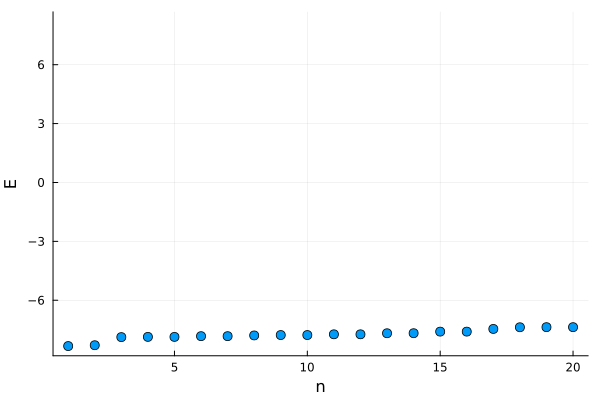

In [11]:
using Plots
plot(1:length(E0[1:20]), E0, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

#### Topological Flat Bands

\begin{equation}
N_d=N_{\phi}-N/\nu_0  \quad \text{(If SP is a flat band}N_{d}=1), \quad \nu_0=1/2 \rightarrow N_d=N_{\phi}-2N=1 \rightarrow N_{\phi}=2N+1
\end{equation}
Ground states degeneracy number given as:
\begin{equation}
D(N,N_d,N_{\phi}) = \frac{(N_d+N-1)!}{N_d!(N-1)!}\frac{N_{\phi}}{N} \rightarrow D=N_{\phi}, \quad N_{\phi}=N_1N_2\phi, \quad \phi\text{:Magnetic flux per plaquet}
\end{equation}
$N_{\phi}$ is equal to unit-cell number, then it is calculated as $D=2N+1$. So, physical filling fraction $N/N_{\phi}=\frac{N}{2N+1}$. For instance, let's say total number of particles $N=4$ and number of unit-cell in each direction $N_xN_y=3X3$. Therefore we wait to get $D=N_{\phi}=2*4+1=9$ ground state degeneracy.

### Bose-Hubbard

\begin{equation}
H = -t \sum_{<ij>} \left( b_i^\dagger b_j + h.c. \right) + U/2 \sum_i n_i \left( n_i -1\right)
\end{equation}

In [2]:
# executeme

function get_Bosonic_MB_Basis(N,PN)
    
    NBasis = NLevelBasis(N)
    States = bosonstates(NBasis, PN) 
    Basis_MB = ManyBodyBasis(NBasis, States)
    
    return Basis_MB
end

get_Bosonic_MB_Basis (generic function with 1 method)

In [3]:
# executeme

Basis_MB = get_Bosonic_MB_Basis(N,PN);

LoadError: UndefVarError: Nx not defined

In [15]:
# executeme

function Kagome_Finite_U(Nx,Ny,Basis_MB,U,sp_op)
    
    N = Nx*Ny*3
    
    # Kinetic term
    KT = SparseOperator(Basis_MB)

    # Interaction term
    IT = SparseOperator(Basis_MB)

    for m in 1:N
        # Occupation (total particle) Operator: number()
        IT = IT + U/2 * number(Basis_MB, m) * ( number(Basis_MB, m) - identityoperator(Basis_MB) ) 

        for n in 1:N
            KT = KT + sp_op.data[m,n] * transition(Basis_MB, m, n)
        end
        
    end
    
    MB_Hamiltonian = KT + IT
    
    return MB_Hamiltonian
end

Kagome_Finite_U (generic function with 1 method)

In [16]:
MB_Hamiltonian = Kagome_Finite_U(Nx,Ny,Basis_MB,U,sp_op)
E1 = eigenenergies(dense(MB_Hamiltonian));

In [17]:
println("Amplitude of Lattice Potantiel=",U)
println("Number of Particle=",PN)
println("Number of Unit-Cell=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Amplitude of Lattice Potantiel=100
Number of Particle=3
Number of Unit-Cell=6
Filling Fraction=0.5


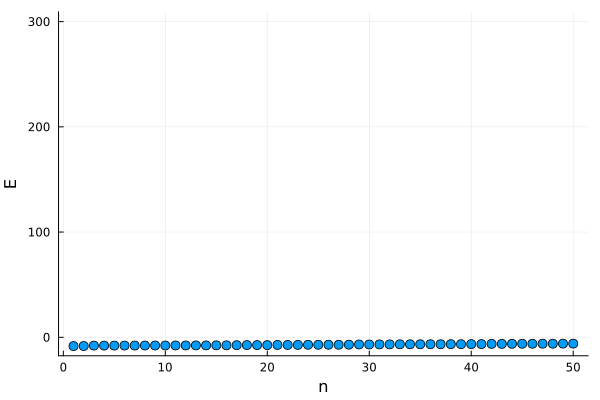

In [18]:
plot(1:length(E1[1:50]), E1, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

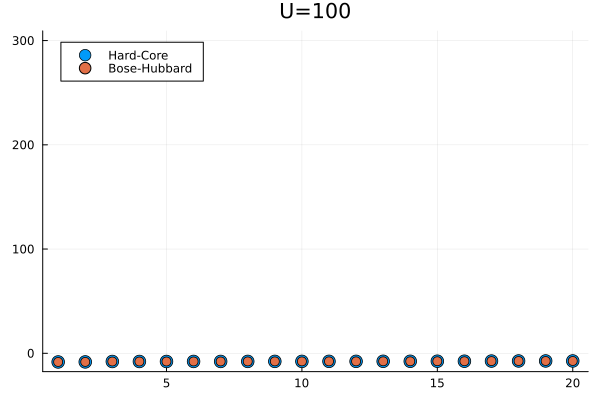

In [22]:
# U yeterince büyük iken bose-hubbard enerjileri, hard-core enerjilerine yaklaşır
plot(1:length(E0[1:20]), E0, seriestype = :scatter, markersize = 7,label="Hard-Core")
plot!(1:length(E1[1:20]), E1, seriestype = :scatter, markersize = 5, label="Bose-Hubbard", legend=:topleft)
title!("U=$U")